The dataset contains information on a collection of preoperties in the Boston area and can be used to determin how the different housing attributes of a specific property affect the property's value.

The column headings of the Boston Heading dataset CSV file can be explained as follows:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (=1 if tract bounds river; 0 otherwise)
- NOX: nitric oxide concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: index of accessibility to radial highways
- PTRATIO: pupil-teacher ratio by town
- LSTAT: % of lower status of the population
- MEDV: median value of owner-occupid homes in $1,000s




In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

C:\Users\Wealthywin\AppData\Local\Temp\ipykernel_7420\3914663630.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [1]:
file_url = r'https://raw.githubusercontent.com/sedeba19/Chapter-2/main/data/Dataset_Boston.csv'

In [8]:
df = pd.read_csv(file_url)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [9]:
# Drop missing values
df.dropna(inplace = True)

# Drop duplicates
df.drop_duplicates(inplace= True)

In [10]:
# List of columns
list(df.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [11]:
# Rename column names
newdf_colnames = df.rename(columns={'CRIM': 'crimeRatePerCapita',
                                    'ZN': 'landOver25k_sqft',
                                    'INDUS': 'non-retailLandProptn',
                                    'CHAS': 'riverDummy',
                                    'NOX': 'nitrixOxide_pp10m',
                                    'RM': 'AvgNo.RoomsPerDwelling',
                                    'AGE': 'ProptnOwnerOccupied',
                                    'DIS': 'weightedDist',
                                    'RAD': 'radialHighwayAccess',
                                    'TAX': 'propTaxRate_per10K',
                                    'PTRATIO': 'pupilTeacherRatio',
                                    'LSTAT': 'pctLowerStatus',
                                    'MEDV': 'medianValue_Ks'})

In [12]:
newdf_colnames

,crimeRatePerCapita,ZN,INDUS,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwayAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [14]:
# Inspect the data types of the columns in your DataFrame
newdf_colnames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1    ZN                     506 non-null    float64
 2   INDUS                   506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwayAccess     506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [16]:
newdf_colnames.shape

(506, 13)

In [17]:
newdf_colnames.dtypes

crimeRatePerCapita        float64
 ZN                       float64
INDUS                     float64
riverDummy                  int64
nitrixOxide_pp10m         float64
AvgNo.RoomsPerDwelling    float64
ProptnOwnerOccupied       float64
weightedDist              float64
radialHighwayAccess         int64
propTaxRate_per10K          int64
pupilTeacherRatio         float64
pctLowerStatus            float64
medianValue_Ks            float64
dtype: object

In [18]:
newdf_colnames.dtypes.value_counts()

float64    10
int64       3
Name: count, dtype: int64

In [21]:
newdf_colnames.describe()

,crimeRatePerCapita,ZN,INDUS,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwayAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [20]:
newdf_colnames.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwayAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [23]:
newdf_colnames.columns

Index(['crimeRatePerCapita', ' ZN ', 'INDUS ', 'riverDummy',
       'nitrixOxide_pp10m', 'AvgNo.RoomsPerDwelling', 'ProptnOwnerOccupied',
       'weightedDist', 'radialHighwayAccess', 'propTaxRate_per10K',
       'pupilTeacherRatio', 'pctLowerStatus', 'medianValue_Ks'],
      dtype='object')

In [25]:
# Divide the DataFrame into Training and Test Sets
X = newdf_colnames.drop('crimeRatePerCapita', axis = 1)
y = newdf_colnames['crimeRatePerCapita']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.3,
                                                    random_state= 1)

In [34]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis =1)

In [35]:
train_data

,ZN,INDUS,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwayAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
13,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,8.26,20.4,0.62976
61,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,14.44,16.0,0.17171
377,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,21.24,13.3,9.82349
39,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,4.32,30.8,0.02763
365,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,7.12,27.5,4.55587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,9.25,20.9,0.03548
72,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52,22.8,0.09164
396,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,19.37,12.5,5.87205
235,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,10.88,24.0,0.33045


In [36]:
test_data

,ZN,INDUS,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwayAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
307,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,18.4,7.53,28.2,0.04932
343,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,7.18,23.9,0.02543
47,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,18.80,16.6,0.22927
67,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,8.10,22.0,0.05789
362,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,10.19,20.8,3.67822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,21.32,19.1,4.42228
95,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,6.65,28.4,0.12204
122,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188,19.1,17.93,20.5,0.09299
260,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264,13.0,9.59,33.8,0.54011


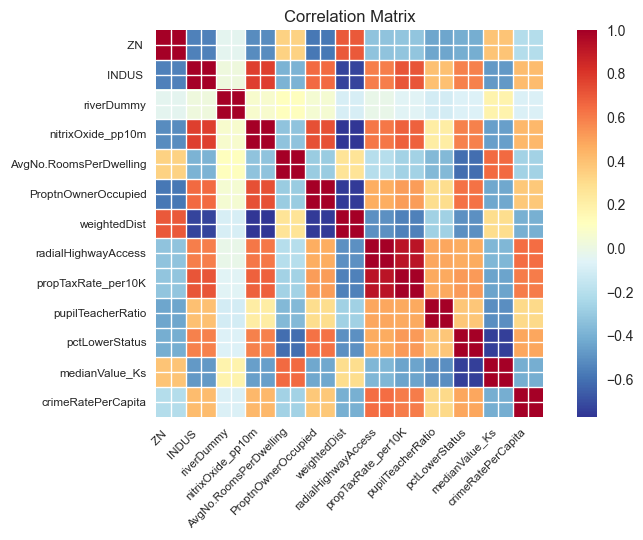

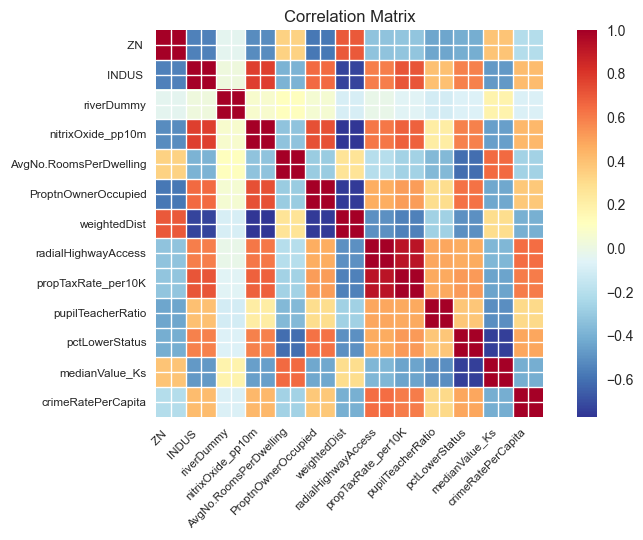

In [38]:
# Calculate and plot a correlation matrix for the `train_data` set
corrMatrix = train_data.corr(method = 'pearson')
xnames_df = list(train_data.columns)
ynames_df = list(train_data.columns)

plot_corr(corrMatrix,
            xnames = xnames_df, 
            ynames = ynames_df, 
            title = None, 
            normcolor = False, 
            cmap = 'RdYlBu_r')


In the heatmap, we can see that there is a strong positive correlation (an increase in one causes an increase in the other) between variables that have oranges or red squares. There is a strong negative correlation (an increase in one causes a decrease in the other) between variables with blue squares. There is little or no correlation between variables with pale-colored squares. Example, it appears to be a relatively strong correlation between `nitrixOxide_pp10m` and `non-retailLandProptn`, but a low correlation between `riverDummy` and any other variable.

We can use the findings from the correlation matrix as the starting point for futher regression analysis. The heatmap gives us a good overview of relationships in the data and can show us which variables to target in our investigation.